In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings("ignore")
import math

# 1 - Business Problem 
Prepare a prediction model for profit of 50startups data
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

# 2 - Data collection and description

In [94]:
df = pd.read_csv("D:Harsha/Data sciences/Assignments/Assignment_5_ Multi Linear Regression/50_Startups.csv")

In [95]:
Startup = df.copy()

In [96]:
Startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [97]:
Startup.shape

(50, 5)

In [98]:
Startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [99]:
Startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [100]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [101]:
Startup.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [102]:
Startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# 3 - Data visualization

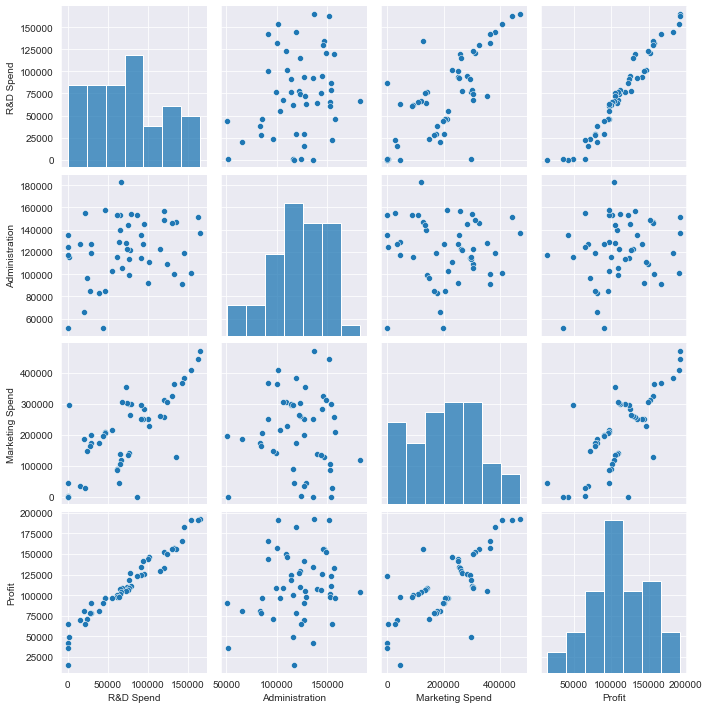

In [103]:
sns.set_style(style='darkgrid')
sns.pairplot(Startup)

<AxesSubplot:ylabel='State'>

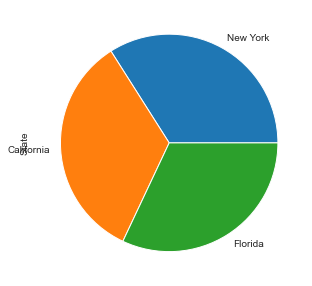

In [104]:
st=Startup['State']
st.value_counts().plot(kind="pie", figsize=(5,5))

<AxesSubplot:xlabel='Profit', ylabel='Density'>

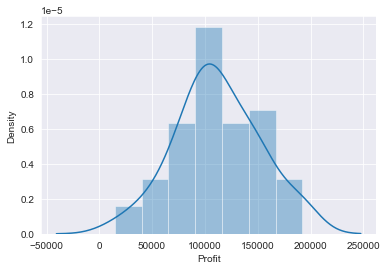

In [105]:
sns.distplot(Startup['Profit'])

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

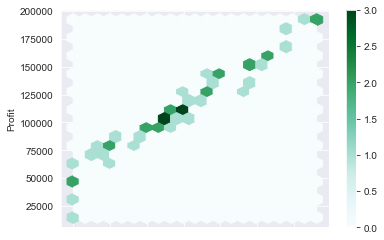

In [106]:
Startup.plot.hexbin(x="R&D Spend", y="Profit", gridsize=20, xlabel="R&D Spend")

# 4 - Correlation Matrix

In [107]:
CorrMatrix = Startup.corr()

<AxesSubplot:>

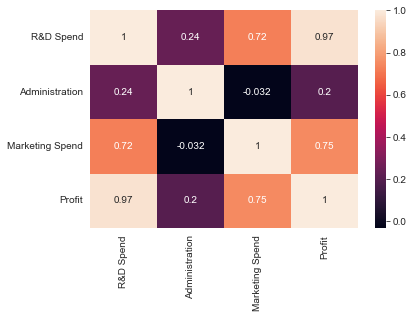

In [108]:
sns.heatmap(CorrMatrix, annot=True)

In [109]:
Startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# 5 - Regression Model

In [110]:
Startup = pd.get_dummies(Startup, columns=['State'])

In [111]:
X = Startup[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Y = Startup[['Profit']]

In [112]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        20:50:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
print(model.tvalues, '\n', model.pvalues)

R&D Spend           17.368580
Administration      -0.517012
Marketing Spend      1.573889
State_California     7.280560
State_Florida        6.939569
State_New York       7.203572
dtype: float64 
 R&D Spend           2.578772e-21
Administration      6.077373e-01
Marketing Spend     1.226769e-01
State_California    4.444178e-09
State_Florida       1.401844e-08
State_New York      5.757175e-09
dtype: float64


### R sq and p value of the model is good, so model can be accepted. However as you can see not all variables have acceptable p value. Thus we have multicollinearity issue in our data frame.

# 6 - Solving Multicollinearity

### Finding Cook's Distance

In [115]:
infl = model.get_influence()
(c, _) = infl.cooks_distance

In [116]:
summary_Startup = infl.summary_frame()

In [117]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

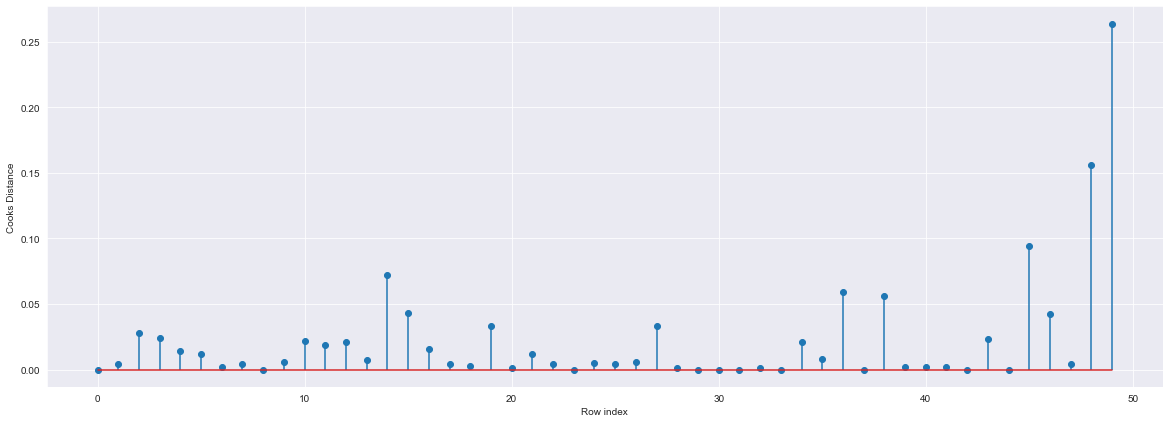

In [118]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startup)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [119]:
summary_Startup.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


In [120]:
(np.argmax(c),np.max(c))

(49, 0.26395943590806437)

#### Index 48 and 49 has highest Cook's Distance
Thus it will be wise to drop this row from the data set

### Finding Variance Inflation Factor (VIF)

In [121]:
vif = pd.DataFrame()

In [122]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [123]:
vif["features"] = X.columns

In [124]:
vif.round(1)

,VIF Factor,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


### As expected, Administration has the lowest variance inflation factor.  We need to discard this variables to improve model and try to solve multicolinearity.

In [142]:
New_Startup = Startup[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York', 'Profit']]

In [126]:
new_model = sm.OLS(Y, New_Startup).fit()
new_predictions = new_model.predict(New_Startup)

In [127]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.066e+31
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:50:57   Log-Likelihood:                 1131.1
No. Observations:                  50   AIC:                            -2250.
Df Residuals:                      44   BIC:                            -2239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend        -6.106e-16   5.21e-16     -1.173      0.247   -1.66e-15    4.39e-16
Marketing Spend  -9.714e-17   6.91e-17     -1.405      0.167   -2.36e-16    4.22e-17
State_California -4.002e-11   3.16e-11     -1.265      0.213   -1.04e-10    2.37e-11
State_Florida    -3.638e-11   3.27e-11     -1.112      0.272   -1.02e-10    2.95e-11
State_New York   -4.729e-11    3.2e-11     -1.477      0.147   -1.12e-10    1.72e-11
Profit               1.0000   6.15e-16   1.62e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        5.186   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.356
Skew:                           0.459   Prob(JB):                        0.187
Kurtosis:                       2.124   Cond. No.                     2.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As you can see, we remove "Administration" from input variables list and run the model again, all the variables are significant.

In [128]:
Startup[Startup.index.isin([48, 49])]

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


##### Removed Index with highest Cook's distance to remove the hightest influencial rows

In [129]:
New_Startup2 = New_Startup.drop(New_Startup.index[[48,49]])

In [130]:
New_Startup2.tail(5)

,R&D Spend,Marketing Spend,State_California,State_Florida,State_New York,Profit
43,15505.73,35534.17,0,0,1,69758.98
44,22177.74,28334.72,1,0,0,65200.33
45,1000.23,1903.93,0,0,1,64926.08
46,1315.46,297114.46,0,1,0,49490.75
47,0.00,0.00,1,0,0,42559.73


In [131]:
new_X = New_Startup2[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = New_Startup2[['Profit']]

In [132]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [133]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.02e-29
Time:                        20:50:58   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now even though the Model has acceptable p Value and R sq value, we can still improve the R square value.

### Square Root Transformation of X

In [134]:
X_sqrt = np.sqrt(New_Startup2[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])

In [135]:
model2 = sm.OLS(new_Y, X_sqrt).fit()
predictions3 = model2.predict(X_sqrt)

In [136]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     84.44
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           8.67e-20
Time:                        20:50:58   Log-Likelihood:                -519.91
No. Observations:                  48   AIC:                             1050.
Df Residuals:                      43   BIC:                             1059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          340.5455     25.777     13.211      0.000     288.560     392.531
Marketing Spend     20.0497     15.481      1.295      0.202     -11.170      51.270
State_California  1.836e+04   6267.224      2.930      0.005    5724.219     3.1e+04
State_Florida     1.692e+04   7013.669      2.413      0.020    2779.320    3.11e+04
State_New York    1.908e+04   6591.247      2.894      0.006    5782.772    3.24e+04
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.161
Skew:                           0.941   Prob(JB):                       0.0279
Kurtosis:                       3.197   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square Root Transformation of Y

In [137]:
Y_sqrt = np.sqrt(New_Startup2['Profit'])

In [138]:
model3 = sm.OLS(Y_sqrt, new_X).fit()
predictions4 = model3.predict(new_X)

In [139]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           3.68e-28
Time:                        20:50:58   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Square Root Transformation of X & Y

In [140]:
model4 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions5 = model4.predict(X_sqrt)

In [141]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           3.64e-24
Time:                        20:50:58   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7 - Output Interpretation

We will use Model 5 as it has the best R square value 1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 1 Thus if the value of x increased by 1, the predicted value of Price will increase by 1.

3 - Adj. R-sqared == 1.

Thus the model explains 100% of the variance in dependent variable
